In [10]:
import numpy as np
from numpy.random import randn, uniform
import matplotlib.pyplot as plt
import scipy

D = 2 # Dimension of the weight space
N_Data_1 = 15 # Number of samples in dataset 1
N_Data_2 = 30 # Number of samples in dataset 2
sigma_w = 2.0
prior_mean = [-5, 0]
prior_precision = np.eye(D) / sigma_w**2
# We summarize distributions using their parameters
prior_par = {'mean': prior_mean, 'precision': prior_precision}
# Here we draw the true underlying w. We do this only once
w_tilde = sigma_w * randn(2) + prior_mean
# Draw the inputs for datasets 1 and 2
X_Data_1 = 0.5 * randn(N_Data_1, D)
X_Data_2 = 0.1 * randn(N_Data_2, D) + 0.5
# Draw the outputs for the datasets
sigma_y = 1.0
y_Data_1 = np.dot(X_Data_1, w_tilde) + sigma_y * randn(N_Data_1)
y_Data_2 = np.dot(X_Data_2, w_tilde) + sigma_y * randn(N_Data_2)

# The complete datasets
Data_1 = {'X': X_Data_1,
          'y': y_Data_1}
Data_2 = {'X': X_Data_2,
          'y': y_Data_2}

def posterior_par(prior_par, Data, sigma_y):
    """Calculate posterior parameters.

    Calculate posterior mean and covariance for given prior mean and
    covariance in the par dictionary, given data and given noise
    standard deviation.
    """
    X = Data['X']
    y = Data['y']
    var_y = sigma_y**2
    w_0 = prior_par['mean']
    K_0 = prior_par['precision']
    K_N = K_0 + (1/var_y)*(X.T @ X)
    b = K_0@w_0 + (1/(var_y))*X.T@y
    w_N = np.linalg.solve(K_N,b)
    return {'mean': w_N, 'precision': K_N}

def visualize_2D_gaussian(two_by_one_mean_vector, two_by_two_covariance_matrix, title):
    choleksy_decomp = scipy.linalg.cholesky(two_by_two_covariance_matrix)
    X_Data_samples = randn(400, 2)@choleksy_decomp.T + two_by_one_mean_vector.T
    axis_1 = X_Data_samples[:,0]
    axis_2 = X_Data_samples[:,1]
    plt.clf()
    plt.plot(axis_1, axis_2, 'x')
    plt.plot(two_by_one_mean_vector[0], two_by_one_mean_vector[1], 'x', markersize = 10, markeredgewidth = 3, color = 'black')
    plt.title(title)
    plt.show()


array_prior_mean = np.array(prior_mean)



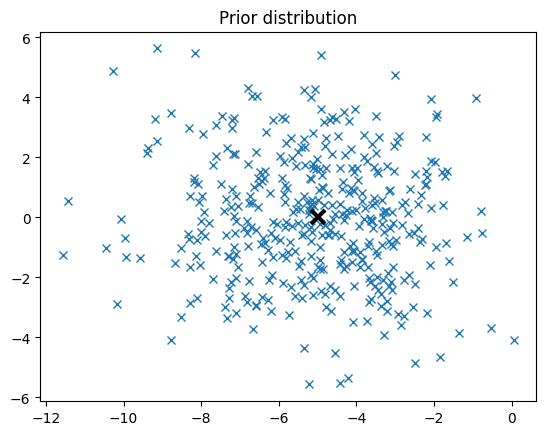

In [11]:
#Visualize prior distribution
visualize_2D_gaussian(array_prior_mean, np.linalg.inv(prior_par['precision']), "Prior distribution")

/var/folders/zr/l03_jjf9731b3hb9wlb0bbfh0000gn/T/ipykernel_51466/1645736628.py:42: RuntimeWarning: invalid value encountered in matmul
  K_N = K_0 + (1/var_y)*(X.T @ X)


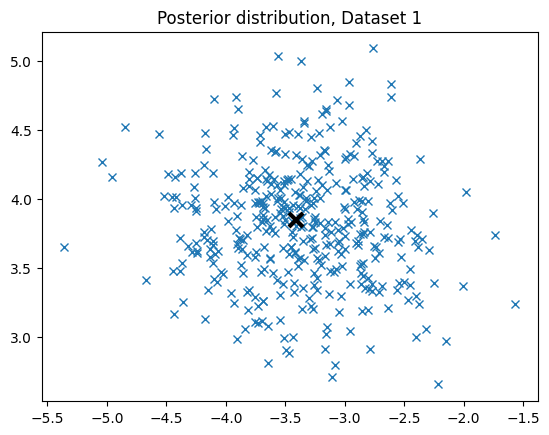

In [12]:
#Question 1(i) Data = Data_1

posterior_params = posterior_par(prior_par, Data_1, sigma_y)
visualize_2D_gaussian(posterior_params['mean'], np.linalg.inv(posterior_params['precision']), "Posterior distribution, Dataset 1")



/var/folders/zr/l03_jjf9731b3hb9wlb0bbfh0000gn/T/ipykernel_51466/1645736628.py:42: RuntimeWarning: invalid value encountered in matmul
  K_N = K_0 + (1/var_y)*(X.T @ X)


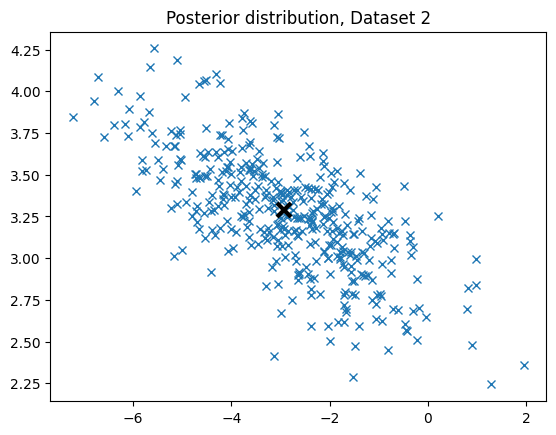

In [13]:
#Question 1(ii) Data = Data_1
posterior_params = posterior_par(prior_par, Data_2, sigma_y)
visualize_2D_gaussian(posterior_params['mean'], np.linalg.inv(posterior_params['precision']), "Posterior distribution, Dataset 2")

(15,)
(30,)


/var/folders/zr/l03_jjf9731b3hb9wlb0bbfh0000gn/T/ipykernel_51466/1645736628.py:42: RuntimeWarning: invalid value encountered in matmul
  K_N = K_0 + (1/var_y)*(X.T @ X)


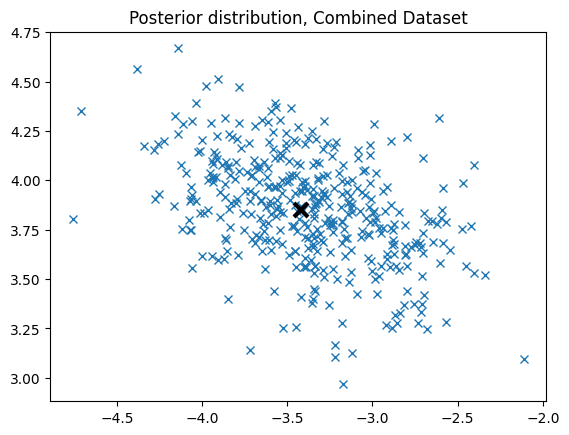

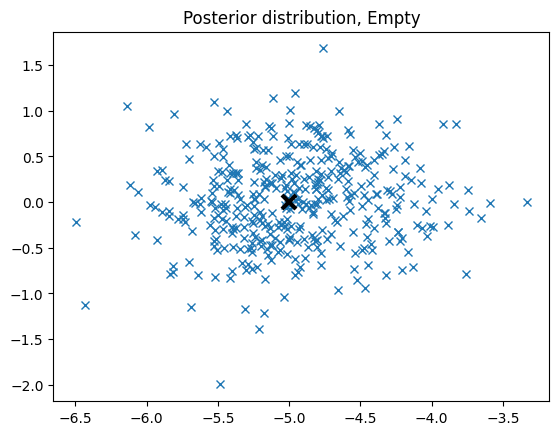

{'mean': array([-3.42056391,  3.84910727]), 'precision': array([[10.40868424,  7.90577011],
       [ 7.90577011, 13.33417518]])}
{'mean': array([-3.42056391,  3.84910727]), 'precision': array([[10.40868424,  7.90577011],
       [ 7.90577011, 13.33417518]])}


In [14]:

combined_X_data = np.vstack((X_Data_1,X_Data_2))
print(y_Data_1.shape)
print(y_Data_2.shape)
combined_Y_data = np.concatenate((y_Data_1,y_Data_2))

combined_data = {'X': combined_X_data, 'y': combined_Y_data}

posterior_params = posterior_par(prior_par, combined_data, sigma_y)
visualize_2D_gaussian(posterior_params['mean'], np.linalg.inv(posterior_params['precision']), "Posterior distribution, Combined Dataset")

empty_data = {'X': np.array([]), 'y': np.array([])}
posterior_params_empty = posterior_par(prior_par, empty_data, sigma_y)
visualize_2D_gaussian(posterior_params_empty['mean'], posterior_params_empty['precision'], "Posterior distribution, Empty")

new_prior = posterior_par(prior_par, Data_1, sigma_y)

posterior_params_double_update = posterior_par(new_prior, Data_2, sigma_y)
print(posterior_params_double_update)
print(posterior_params)